In [41]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error

In [2]:
#loading dataset
dfins = pd.read_csv("insurance.csv")
dfins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### NANs/Null Values

In [3]:
dfins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Error Detection

<Axes: >

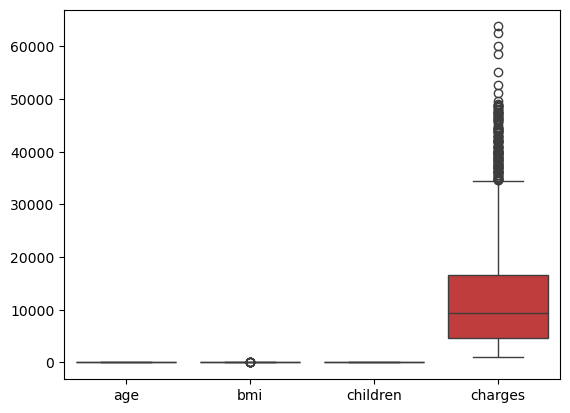

In [5]:
sns.boxplot(dfins)

<Axes: ylabel='bmi'>

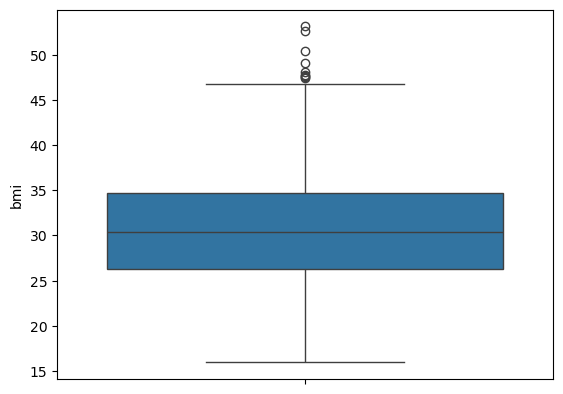

In [6]:
sns.boxplot(dfins["bmi"])

<Axes: ylabel='charges'>

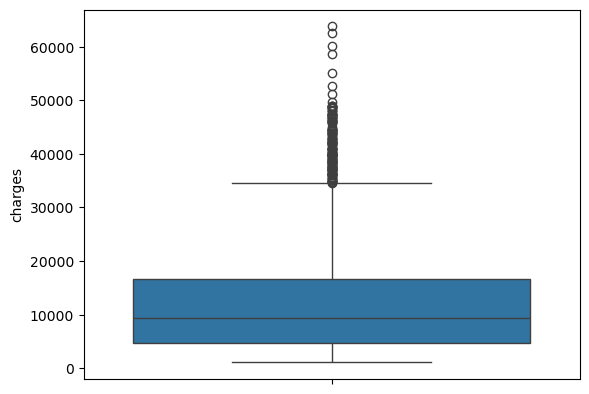

In [7]:
sns.boxplot(dfins["charges"])

In [9]:
cols_with_errors = ["bmi","charges"]
for i in cols_with_errors:
    q1 = dfins[i].quantile(0.25)
    q3 = dfins[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    dfins[i] = dfins[i].map(lambda x:lower if x<lower else upper if x>upper else x)

<Axes: >

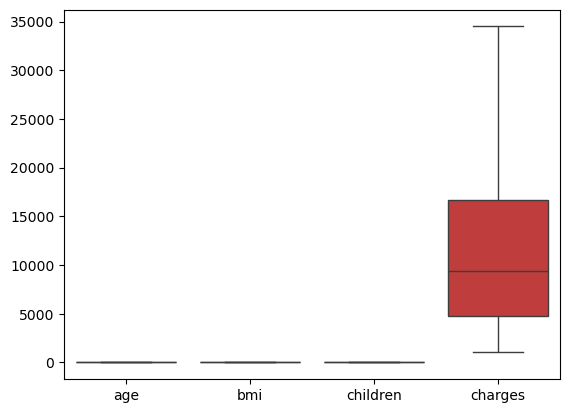

In [10]:
sns.boxplot(dfins)

### Encoding

In [11]:
dfins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
pd.get_dummies(dfins,drop_first=True).astype("int32")

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


In [15]:
dfins = pd.get_dummies(dfins,drop_first=True).astype("int32")

In [16]:
dfins

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


### Data Seperation

In [19]:
#independent columns
X = dfins.drop("charges",axis=1)

In [20]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30,3,1,0,1,0,0
1334,18,31,0,0,0,0,0,0
1335,18,36,0,0,0,0,1,0
1336,21,25,0,0,0,0,0,1


In [22]:
#Dependent column
y = dfins["charges"]

In [23]:
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    29141
Name: charges, Length: 1338, dtype: int32

### Data Splitting

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [27]:
X_train.shape

(1070, 8)

In [28]:
X_test.shape

(268, 8)

In [29]:
y_train.shape

(1070,)

In [30]:
y_test.shape

(268,)

### Model Building

In [34]:
lr_model = LinearRegression()

In [35]:
lr_model

LinearRegression()

In [36]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [48]:
lr_model.score(X_test,y_test)

0.801295650550951

In [42]:
#slope
lr_model.coef_

array([  221.0474687 ,   216.83788789,   511.65239085,  -168.70596836,
       20095.13737395,  -490.45468224,  -946.20102978,  -962.07080058])

In [43]:
#y-intercept
lr_model.intercept_

np.float64(-6675.503626290631)

### Auto Randomstate

In [40]:
score_list=[]
for i in range(500):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lr_model1 = LinearRegression()
    lr_model1.fit(X_train,y_train)
    score = lr_model1.score(X_test,y_test)
    score_list.append(score)
m = max(score_list)
i = score_list.index(m)
print("Random state :",m)
print("Score :",i)

Random state : 0.8409877889979681
Score : 367


### Error Metrics

In [45]:
y_pred = lr_model.predict(X_test)

In [46]:
y_pred

array([14319.99505962,  7361.21240632, 13029.0554797 , 11050.58841806,
        8258.99957604, 25559.47844576,  4730.33572381, 31440.54029498,
       31953.01671488,  8028.4403975 ,  6429.53564982,  8883.87812497,
       11160.07831446, 27109.06978121, 14840.06661211, 23596.05757974,
        7536.79904275, 10893.38469492,  3786.18904988, 10687.17012904,
        8875.83659316,  8043.89252939, 30640.10951252, 10187.34261778,
       13790.50748661, 26591.9512565 , 12199.87209604,  1896.75490318,
       28762.33555581,  8507.41300071,  4596.98952026,  9568.44606499,
       12035.75333833, 14176.924206  , 10883.83297599,  2737.02243928,
        3808.48744695,  2797.83721648, 23043.81956784, 11831.6398822 ,
       11384.86204484,  6494.98735201, 13751.41395778,  7648.63041533,
       28520.38998755,  6312.52614397,  3557.690972  , 10633.647136  ,
        7296.88720137, 10001.74421093,  8682.91000789, 14397.71804062,
       13340.11738331,  5450.40684092, 11913.88019332, 11879.89579747,
      

In [47]:
#R square
r2 = r2_score(y_test,y_pred)
r2

0.801295650550951

In [51]:
#no. of rows/data points in test_data
n = len(y_test)
n

268

In [54]:
#no. of independent features
p = X_test.shape[1]
p

8

In [55]:
#Adjusted R square
adj_r2 = 1-((1-r2) * (n-1)/ (n-p-1))
adj_r2

0.7951580644675826

In [56]:
mean_squared_error(y_test,y_pred)

20581315.66102058

In [57]:
root_mean_squared_error(y_test,y_pred)

4536.6634943558

In [58]:
mean_absolute_error(y_test,y_pred)

3025.1313931757254